In [219]:
import re
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score, recall_score,confusion_matrix,f1_score

import spacy
nlp = spacy.load('pt_core_news_sm')

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [220]:
df = pd.read_csv('tweetscomhierarquia.csv', sep=',', encoding='utf-8')
df

,text,Hate.speech,Sexism,Body,Racism,Ideology,Homophobia,Origin,Religion,Health,...,Thin.women,Arabic,East.europeans,Africans,South.Americans,Brazilians,Migrants,Homossexuals,Thin.people,Ageing
0,"""não come mel, morde marimbondo""",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"não tem pinto, tem orgulho !",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Não vê essa merda de Crepúsculo! Pra isso temo...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"não da tapa na bundinha, da cotovelada nas cos...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,o diminutivo INHO não acompanha a trajetória d...,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5663,Na minha sala só tem viado e sapatão e a cois...,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5664,PARABENS SAPATÃO SDDS @attomiter https://t.co/...,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5665,RT @toquedeveludo: Agora um poema:\nEu sou sap...,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5666,O mundo das sapatao é mais ligado do que eu im...,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [221]:
df = df[['Hate.speech', 'text']]
y = (df.iloc[:, :-1].values).ravel()
print(df[['Hate.speech', 'text']])


      Hate.speech                                               text
0               0                   "não come mel, morde marimbondo"
1               0                       não tem pinto, tem orgulho !
2               0  Não vê essa merda de Crepúsculo! Pra isso temo...
3               0  não da tapa na bundinha, da cotovelada nas cos...
4               1  o diminutivo INHO não acompanha a trajetória d...
...           ...                                                ...
5663            1  Na minha sala só tem viado e sapatão  e a cois...
5664            1  PARABENS SAPATÃO SDDS @attomiter https://t.co/...
5665            1  RT @toquedeveludo: Agora um poema:\nEu sou sap...
5666            1  O mundo das sapatao é mais ligado do que eu im...
5667            1  Gente, sapatão é uma coisa q me assusta https:...

[5668 rows x 2 columns]


In [222]:
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [223]:
from unidecode import unidecode

texto_limpo = df.text.str.lower().apply(unidecode).replace(r'[^a-z\s!?]', '', regex=True).replace('',None)

texto_limpo = texto_limpo.dropna()


In [224]:
words_to_remove = ['rt']
def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc if token.text.lower() not in stopwords + words_to_remove]
    return lemmatized_tokens

tokens = texto_limpo.apply(lemmatize_text)

tokens


0                      [nao, comer, mel, morde, marimbor]
1                                [nao, pinto, orgulho, !]
2       [nao, ve, merda, crepusculo, !, pra, cinebiogr...
3             [nao, tapa, bundinha, cotovelada, costa, !]
4       [diminutivo, inho, nao, acompanhar, trajetoria...
                              ...                        
5663    [sala, so, viar, sapatao,  , coisa, engracado,...
5664    [parabem, sapatao, sdds, attomiter, httpstcohn...
5665    [toquedeveludo, agora, poema, \n, sapatao, \n,...
5666                   [mundo, sapatao, ligado, imaginar]
5667    [gente, sapatao, coisa, q, assustar, httpstcoh...
Name: text, Length: 5668, dtype: object

In [225]:

print(tokens[0])

['nao', 'comer', 'mel', 'morde', 'marimbor']


In [226]:

vectorizer = CountVectorizer()


X = vectorizer.fit_transform(tokens.str.join(' '))


vocabulario = vectorizer.get_feature_names_out()


X_dense = X.toarray()

X_dense[0][740]

vectorizer.vocabulary_

df_count = pd.DataFrame(X_dense, columns=vocabulario)


df_count['gorda'][df_count['gorda'].gt(0)]


#word_freq = dict(df_count.sum())


#df_count.sum().sort_values(ascending = False)[:10]


382     1
495     1
584     1
958     1
1416    1
1919    1
3013    1
3343    1
3907    1
3914    1
3981    1
4196    1
4220    1
4229    1
4230    1
4314    1
4327    1
4376    1
4389    1
4423    1
4424    1
4442    1
4602    1
4605    1
4767    1
4792    1
4806    1
4836    1
4839    1
4840    1
4861    1
4904    1
4948    1
5011    1
5076    1
5288    1
Name: gorda, dtype: int64

In [227]:
vectorizerTFIDF = TfidfVectorizer()


X_TF = vectorizerTFIDF.fit_transform(tokens.str.join(' '))


vocabTFIDF = vectorizerTFIDF.get_feature_names_out()


df_tfidf = pd.DataFrame(X_TF.toarray(), columns=vocabTFIDF)
vectorizerTFIDF.vocabulary_
df_tfidf


df_tfidf['gorda'][~df_tfidf['gorda'].eq(0.0)]

382     0.251112
495     0.251950
584     0.289275
958     0.250200
1416    0.415836
1919    0.339700
3013    0.208365
3343    0.290108
3907    0.184181
3914    0.374586
3981    0.283328
4196    0.241843
4220    0.367062
4229    0.435434
4230    0.284194
4314    0.235725
4327    0.308070
4376    0.369848
4389    0.323685
4423    0.245805
4424    0.329712
4442    0.235723
4602    0.217715
4605    0.446027
4767    0.278769
4792    0.189616
4806    0.194103
4836    0.236900
4839    0.238345
4840    0.349656
4861    0.333117
4904    0.213739
4948    0.276971
5011    0.279639
5076    0.265374
5288    0.270732
Name: gorda, dtype: float64

In [228]:
Counter(df["Hate.speech"])

Counter({0: 4440, 1: 1228})

In [229]:
df["Hate.speech"].unique()

array([0, 1], dtype=int64)

In [230]:
df_train, df_test = train_test_split(df, test_size=0.30, random_state=42, stratify=df['Hate.speech'])
df_train, df_vad = train_test_split(df_train, test_size=0.30, random_state=42, stratify=df_train['Hate.speech'])


In [231]:
X_train_tfidf = vectorizer.fit_transform(df_train['text'])


In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = ExtraTreesClassifier()
model.fit(X_train_tfidf, df_train['Hate.speech'])



ExtraTreesClassifier()

In [233]:
X_vad_tfidf = vectorizer.transform(df_vad['text'])
y_pred_vad = model.predict(X_vad_tfidf)
accuracy_vad = accuracy_score(df_vad['Hate.speech'], y_pred_vad)
print("Acurácia na validação:", accuracy_vad)

Acurácia na validação: 0.8782535684298909


In [234]:
# Avaliação do modelo com dados de teste
X_test_tfidf = vectorizer.transform(df_test['text'])
y_pred_test = model.predict(X_test_tfidf)
accuracy_test = accuracy_score(df_test['Hate.speech'], y_pred_test)
print("Acurácia no teste:", accuracy_test)


Acurácia no teste: 0.884185773074662


In [235]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [236]:
scores = cross_val_score(model, X_train, y_train, cv=kf)
print("Cross-validation scores:", scores)


Cross-validation scores: [0.89168766 0.8790932  0.8776797  0.87263556 0.88020177]


In [237]:
misclassified_indices = []

for fold, (train_index, test_index) in enumerate(kf.split(X_train)):
    X_fold_train, X_fold_test = X_train[train_index], X_train[test_index]
    y_fold_train, y_fold_test = y_train[train_index], y_train[test_index]

In [238]:
model.fit(X_fold_train, y_fold_train)


ExtraTreesClassifier()

In [239]:
y_pred_fold_test = model.predict(X_fold_test)

In [240]:
fold_misclassified_indices = [i for i, (true_label, pred_label) in enumerate(zip(y_fold_test, y_pred_fold_test)) if true_label != pred_label]
fold_misclassified_indices = [test_index[i] for i in fold_misclassified_indices]
misclassified_indices.extend(fold_misclassified_indices)

print(f"Fold {fold + 1} - Exemplos classificados incorretamente:", len(fold_misclassified_indices))
print(fold_misclassified_indices)

Fold 5 - Exemplos classificados incorretamente: 90
[90, 172, 395, 396, 512, 540, 559, 595, 625, 656, 658, 699, 833, 853, 878, 1015, 1082, 1153, 1154, 1156, 1197, 1291, 1346, 1434, 1438, 1478, 1516, 1528, 1570, 1571, 1595, 1695, 1698, 1757, 1773, 1785, 1787, 1799, 1923, 1969, 1974, 1986, 1998, 2141, 2198, 2207, 2294, 2300, 2317, 2511, 2524, 2539, 2559, 2617, 2625, 2681, 2690, 2710, 2735, 2774, 2811, 2837, 2848, 2853, 2879, 2888, 2904, 2945, 2983, 2999, 3059, 3108, 3152, 3184, 3294, 3315, 3327, 3359, 3369, 3504, 3594, 3614, 3655, 3668, 3696, 3742, 3807, 3844, 3846, 3917]


In [241]:
for i in fold_misclassified_indices:
   print(df['text'][i],df['Hate.speech'][i])


Sim, eu tenho mais o que fazer do que ficar twittando para seu entretenimento! 0
@paullamirella Vc conhece a Banda #thecorrs ? #fikdik "Runaway", "No frontiers" "At Your Side".. e por aí vai (AmoMuito) 0
vou ler a opinião de vcs... eu não achei nada demais a piada pras pessoas se revoltarem tanto... mas dependendo da opinião de vcs eu apago 0
uma chuva de tweets me xingando tiveram origem do site diario do nordeste, da globo. http://t.co/vEkpqYjj 0
Pior que Ades só Aids 0
TROCO 2 TOMATES POR UM INGRESSO DO ROCK IN RIO. 0
Seria uma pena http://t.co/DmfI0kboqw 0
N sou racista pq racismo É CRIME e crime é coisa de pretokkkkkk 1
RT @radbrancaemagra: EU NÃO SOU RACISTA EU JÁ DEI UNS BJ NUM NEGUINHO 0
@cecinne crime de ódio, se não me engano 0
@loIitagem o Oscar é racista. se tu diz que não, é ignorar o racismo apontado pelos negros. "só porque não tem" não tem, that is the point. 0
negras, queimem seus sutiãs, vocês estão se apropriando da cultura branca norte-americana!!! 1
nada melhor do 

In [242]:
misclassified_indices = []

for fold, (train_index, test_index) in enumerate(kf.split(X_train)):
    X_fold_train, X_fold_test = X_train[train_index], X_train[test_index]
    y_fold_train, y_fold_test = y_train[train_index], y_train[test_index]

    model.fit(X_fold_train, y_fold_train)
    y_pred_fold_test = model.predict(X_fold_test)

    fold_misclassified_indices = [i for i, (true_label, pred_label) in enumerate(zip(y_fold_test, y_pred_fold_test)) if true_label != pred_label]
    fold_misclassified_indices = [test_index[i] for i in fold_misclassified_indices]

    misclassified_indices.extend(fold_misclassified_indices)

    print(f"Fold {fold + 1} - Exemplos classificados incorretamente:", len(fold_misclassified_indices))
    print(fold_misclassified_indices)
    for i in fold_misclassified_indices:
        print(df['text'][i], df['Hate.speech'][i])

Fold 1 - Exemplos classificados incorretamente: 85
[44, 51, 70, 88, 179, 194, 221, 315, 325, 351, 358, 414, 439, 500, 527, 538, 544, 549, 564, 599, 621, 676, 680, 755, 838, 839, 842, 1022, 1104, 1270, 1337, 1398, 1510, 1513, 1586, 1588, 1632, 1675, 1729, 1778, 1815, 1873, 1947, 1988, 1993, 2023, 2069, 2090, 2096, 2111, 2186, 2266, 2325, 2358, 2364, 2403, 2505, 2531, 2686, 2688, 2736, 2753, 2791, 2912, 2969, 2989, 3135, 3189, 3257, 3285, 3307, 3386, 3432, 3522, 3605, 3618, 3624, 3641, 3673, 3718, 3794, 3797, 3814, 3847, 3942]
Homem de verdade que não sabe desenhar um Pinto, não conhece o pau que tem! Honre seu Pinto!!!! 1
@homemdeverdade não fala de boquete, recebe. RT @SarahShoeMe ""Liberdade"... significa falar de boquete como quem fala do clima...." 0
Homem que é homem arrota com suco de laranja. 1
não sabe que cor é bege 0
@agdabritto Ixi, amiga.. marron.. marromenos.. termino de namoro, foda ne 0
@_jujuba_lima Taí, sou ótima com sobremesas, doces, bolos... 0
@aninha_ebc Num dá vont

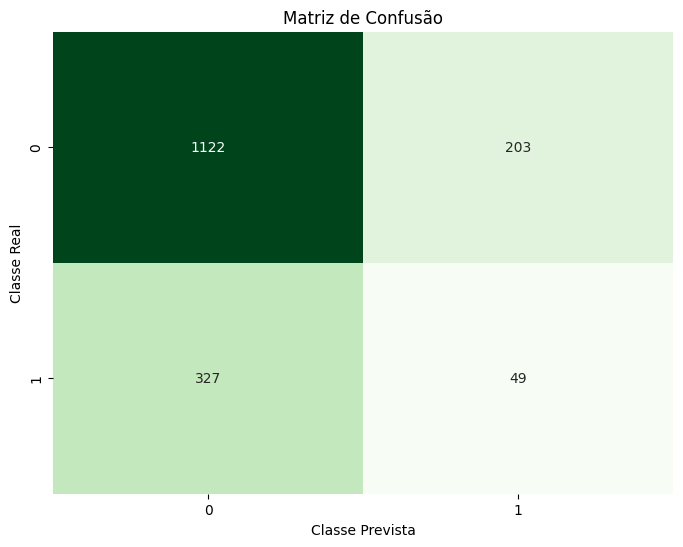

In [243]:
# Calculando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Criando uma figura
plt.figure(figsize=(8, 6))

# Desenhando a matriz de confusão usando seaborn
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=False)

# Adicionando rótulos e título
plt.title("Matriz de Confusão")
plt.xlabel("Classe Prevista")
plt.ylabel("Classe Real")

# Exibindo a matriz de confusão
plt.show()

In [244]:



y_pred_test = model.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred_test)
print("Acurácia  no conjunto de teste:", accuracy_test)
# Precisão no conjunto de teste
precision_test = precision_score(y_test, y_pred_test, average='weighted')
print("Precisão  no conjunto de teste:", precision_test)
# Revocação no conjunto de teste
recall_test = recall_score(y_test, y_pred_test, average='weighted')
print("Revocação no conjunto de teste:", recall_test)
f1_test = f1_score(y_test, y_pred_test, average='weighted')
print("F1-Score no conjunto de teste:", f1_test)

Acurácia  no conjunto de teste: 0.8700764256319812
Precisão  no conjunto de teste: 0.8650804487375511
Revocação no conjunto de teste: 0.8700764256319812
F1-Score no conjunto de teste: 0.8596407676336103


In [245]:
print(df.count())

Hate.speech    5668
text           5668
dtype: int64
